<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S6_C1_NN_keras_Minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalamos TensorFlow en nuestro entorno de ejecución
import tensorflow as tf

# Keras es una serie de APIs de TensorFlow que permiten simplificar el desarrollo de modelos
from tensorflow import keras

# NumPy nos permite realizar operaciones de álgebra lineal, matrices y es muy flexible para ser utilizada con TensorFlow
import numpy as np

# Matplotlib simplifica la creación de gráficos y será muy importante para presentar los resultados obtenidos
import matplotlib.pyplot as plt

In [ ]:
datos = keras.datasets.mnist

#codigo de ejemplo de keras

* (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

* assert x_train.shape == (60000, 28, 28)
* assert x_test.shape == (10000, 28, 28)
* assert y_train.shape == (60000,)
* assert y_test.shape == (10000,)

In [ ]:
datos

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [ ]:
# Almacenamos la información de la base de datos y la dividimos en conjuntos de prueba y entrenamiento.
# X train = imagnes de entrenamiento
# Y_train = labels_entrenamiento
(imagenes_entrenamiento, labels_entrenamiento), (imagenes_prueba, labels_prueba) = datos.load_data()

# Dado que las imágenes tienen una descripción numérica, es mucho más sencillo revisarlas por su nombre
numeros_imagenes = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']
# Lo anterior significa que las imágenes cuya clase esté identificada como ‘0’ serán de playeras; las identificadas con ‘1’, pantalones; y así sucesivamente.

**¿Cómo está almacenada la información de cada una de las imágenes de la base de datos?**

Por cada pixel, se guarda un valor numérico del 0 al 255 que corresponde al color de dicho pixel. Por lo tanto, será mucho más sencillo normalizar dichos valores a que estén dentro del rango [0–1]. A continuación, se muestra el vector de una de las imágenes.

In [ ]:
imagenes_entrenamiento[28] # de las imágenes de entrenamiento escojo []

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  80, 189, 254, 255, 254, 254, 254, 174,
        101,  31,  50,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  80, 242, 253, 253, 253, 253, 253, 253, 253,
        253, 216, 226, 206, 200, 200,  58,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 101, 253, 253, 253, 253, 253, 253, 253, 253,
        253, 253, 253, 253, 253, 253, 227,  53,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 251, 253, 253, 253, 253, 253, 253, 253, 253,
        253, 253, 253, 253, 253, 253, 253, 249, 181,  17,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 122, 214, 214, 158,  61,  61, 113, 214, 214,
        250, 253, 253, 253, 253, 253, 253, 253, 253,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        105, 115, 115, 237, 253, 253, 253, 253, 253, 129,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  13,  24, 168, 241, 253, 253, 199,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   2, 102, 243, 253, 253,  87,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  16, 253, 253, 253, 197,  22,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  22, 182, 253, 253, 251, 101,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   3,  99, 198, 253, 253, 247, 129,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  99, 253, 253, 253, 253, 191,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 117,
        224, 244, 253, 253, 239,  30,  23,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 169, 213,
        253, 253, 253, 197,  79,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  86, 253, 253,
        253, 242, 137,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 216, 253, 253,
        253, 141,  62,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 239, 253, 253,
        253, 253, 253, 172, 162, 162, 162,  64,   8,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  80, 247, 253, 253,
        253, 253, 253, 253, 253, 253, 253, 253, 253, 199,  66,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 199, 227,
        253, 253, 253, 253, 253, 253, 253, 220, 230, 201, 235,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
255-imagenes_entrenamiento[28] # con 255 paso a negativo las imágenes


array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 175,  66,   1,   0,   1,   1,   1,  81,
        154, 224, 205, 243, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 175,  13,   2,   2,   2,   2,   2,   2,   2,
          2,  39,  29,  49,  55,  55, 197, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 154,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   2,  28, 202, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255,   4,   2,   2,   2,   2,   2,   2,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   6,  74, 238, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 133,  41,  41,  97, 194, 194, 142,  41,  41,
          5,   2,   2,   2,   2,   2,   2,   2,   2, 210, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        150, 140, 140,  18,   2,   2,   2,   2,   2, 126, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 242, 231,  87,  14,   2,   2,  56, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 253, 153,  12,   2,   2, 168, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 239,   2,   2,   2,  58, 233, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 233,  73,   2,   2,   4, 154, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 252, 156,  57,   2,   2,   8, 126, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 156,   2,   2,   2,   2,  64, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 138,
         31,  11,   2,   2,  16, 225, 232, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 197,  86,  42,
          2,   2,   2,  58, 176, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 169,   2,   2,
          2,  13, 118, 239, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  39,   2,   2,
          2, 114, 193, 247, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 250,  16,   2,   2,
          2,   2,   2,  83,  93,  93,  93, 191, 247, 248, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 175,   8,   2,   2,
          2,   2,   2,   2,   2,   2,   2,   2,   2,  56, 189, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 160,  56,  28,
          2,   2,   2,   2,   2,   2,   2,  35,  25,  54,  20, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

In [ ]:
labels_entrenamiento[0] # etiqueta (etiqueta de entrenamiento) de clase de la imagen

5

In [ ]:
imagenes_prueba[300]  # de las imágenes de prueba escojo []

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 193, 192,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  35, 242, 223,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  76, 255, 223,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         11, 226, 254, 147,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        120, 254, 254,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 101,
        254, 254, 254,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 254,
        254, 224, 254,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 252, 254,
         39, 236, 254,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 226, 249,  46,
          1, 237, 213,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  27, 225, 243,  85,   0,
         80, 252, 116,   0,   0,   0,   0,   0,   0,  69,  74,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 124, 254, 127,   0,   0,
        204, 247,  27,   0,   0,   0,   0,  86, 122, 189,  96,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 132, 254, 229, 197, 197,
        254, 241, 119, 108, 177, 197, 197, 235, 218, 102,  11,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  14,  84, 160, 227, 254,
        254, 250, 250, 250, 212, 223, 160,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 254,
        178,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 120, 254,
         70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 188, 254,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 222, 181,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23, 254,  97,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23, 251,  48,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
255-imagenes_prueba[300] # con 255 paso a negativo las imágenes

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255,  62,  63, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 220,  13,  32, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 179,   0,  32, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        244,  29,   1, 108, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        135,   1,   1, 192, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 154,
          1,   1,   1, 211, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 215,   1,
          1,  31,   1, 211, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 207,   3,   1,
        216,  19,   1, 211, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 213,  29,   6, 209,
        254,  18,  42, 252, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 228,  30,  12, 170, 255,
        175,   3, 139, 255, 255, 255, 255, 255, 255, 186, 181, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 131,   1, 128, 255, 255,
         51,   8, 228, 255, 255, 255, 255, 169, 133,  66, 159, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 123,   1,  26,  58,  58,
          1,  14, 136, 147,  78,  58,  58,  20,  37, 153, 244, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 241, 171,  95,  28,   1,
          1,   5,   5,   5,  43,  32,  95, 249, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 246,   1,
         77, 249, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 135,   1,
        185, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  67,   1,
        251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 243,  33,  74,
        254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 232,   1, 158,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 232,   4, 207,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

In [ ]:
labels_prueba[300] # etiqueta (etiqueta de prueba) de clase de la imagen

4

In [ ]:
print(imagenes_entrenamiento.shape) # dimensiones de los datos de entrenamiento
print(labels_entrenamiento.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(imagenes_prueba.shape) # dimensiones de los datos de prueba
print(labels_prueba.shape)

(10000, 28, 28)
(10000,)


**Modelo**

In [ ]:
from keras.models import Sequential #La clase Sequential en Keras es una forma simple de crear redes neuronales capa por capa
      # metodo de APILACIÓN de las capas

from keras import layers # layers contiene los diferentes TIPOS de capas
      # metodo de asignacion de los tipos de capas

 #capa entrada con 786 neuronas, (flatten)
 #capa oculta con 128 neuronas con función (RElu)
 #capa de salida con función de activación (softmax)

In [ ]:

# una red neuronal con una capa de entrada con 786 neuronas, una capa oulta con 128 neuronas con funcion RElu y una capa de salida con funcionde activacion softmax
modelo = Sequential([
    layers.Flatten(input_shape=(28, 28)), # neuronas de entrada
         # matrix de 28 x 28 a una capa de 786 (tensorflow 2 a 1 capa)
         # es obligatorio usar para cada dato de entrada una "neurona para iniciar la interfaz o red"
    layers.Dense(128, activation='relu'), # neuronas de la capa oculta
    layers.Dense(10, activation='softmax') # neuronas de capa de salida
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  # .compile : metodo para configurar el entrenamiento del modelo:
    # optimizador (optimizer) : define el algoritmo que reducira la perdida al ajustar los pesos
      # adam: algoritmo optimizacion adactativo, majora del gradiente decendente ajuste tasa de aprendizaje

    # Función de pérdida (loss): compara que tan bien o mal esta la prediccion comparandola con la respuesta correcta
      #
    # Métricas (metrics) : evalua el rendimiento monitoreando el desempeño


history_train = modelo.fit(imagenes_entrenamiento, labels_entrenamiento, epochs=8)
    # Estamos incluyendo un split para separar de los datos de entrenamiento un conjunto para validación
history_train_val = modelo.fit(imagenes_prueba, labels_prueba, epochs=8, validation_split=0.8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8213 - loss: 6.8414
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8970 - loss: 0.4420
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9263 - loss: 0.2814
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9377 - loss: 0.2353
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9412 - loss: 0.2278
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9449 - loss: 0.2165
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9506 - loss: 0.1978
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9530 - loss: 0.1882
Epoch 1/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9371 - loss: 0.3270 - val_accuracy: 0.9451 - val_loss: 0.2748
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9648 - loss: 0.1261 - val_accuracy: 0.9491 - val_loss: 0.2586
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step

<Axes: >

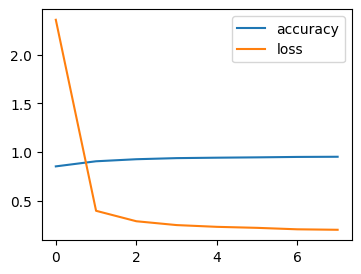

In [ ]:
import pandas as pd

pd.DataFrame(history_train.history).plot(figsize=(4, 3))


<Axes: >

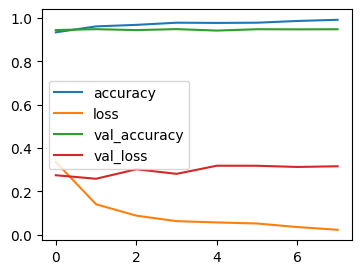

In [ ]:
pd.DataFrame(history_train_val.history).plot(figsize=(4, 3))

In [ ]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

**Pruebas del modelo **
Este comando nos permite conocer si nuestro modelo propuesto es adecuado. Por los resultados que arroja, podemos decir que lo es. Sin embargo, puede haber ocasiones en que necesitemos resultados con mayor precisión o mayor rapidez al momento de realizar el entrenamiento. Todo depende de las circunstancias.

In [ ]:
# X_test = imagenes_prueba
# Y_test = labels_prueba
errores_prueba, precision_prueba = modelo.evaluate(imagenes_prueba, labels_prueba)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1801


In [ ]:
# La siguiente línea, nos imprime la probabilidad obtenida de que la imagen ‘0’ del set de imágenes de prueba corresponda con una de las categorías de imágenes
prediccion = modelo.predict(imagenes_prueba)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
imag = 300

In [ ]:
imagenes_prueba[imag]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 193, 192,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  35, 242, 223,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  76, 255, 223,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         11, 226, 254, 147,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        120, 254, 254,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 101,
        254, 254, 254,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 254,
        254, 224, 254,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 252, 254,
         39, 236, 254,  44,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 226, 249,  46,
          1, 237, 213,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  27, 225, 243,  85,   0,
         80, 252, 116,   0,   0,   0,   0,   0,   0,  69,  74,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 124, 254, 127,   0,   0,
        204, 247,  27,   0,   0,   0,   0,  86, 122, 189,  96,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 132, 254, 229, 197, 197,
        254, 241, 119, 108, 177, 197, 197, 235, 218, 102,  11,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  14,  84, 160, 227, 254,
        254, 250, 250, 250, 212, 223, 160,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 254,
        178,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 120, 254,
         70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 188, 254,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 222, 181,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23, 254,  97,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23, 251,  48,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# la etiqueta real
labels_prueba[imag]

4

In [ ]:
print(prediccion[imag])

[1.40974175e-14 5.29589775e-11 1.47685941e-09 1.40304009e-15
 9.99999344e-01 7.10945896e-13 4.53509337e-08 1.21424662e-07
 1.45254817e-14 4.36624447e-07]


In [ ]:
print(prediccion[imag].sum())

0.99999994


In [ ]:
print(np.round(prediccion[imag]))

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
print(np.argmax(prediccion[imag]))

4


In [ ]:
imag = int(input('Por favor ingrese el número de la imagen a evaluar que sea positivo y menor a 10000: '))
imagenes_prueba[imag]

Por favor ingrese el número de la imagen a evaluar que sea positivo y menor a 10000: 500


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  44,  47,  28, 116, 153, 254,
        255, 195, 115,  42,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  67, 121, 241, 253, 188, 253, 253, 253,
        253, 253, 253, 234,  65,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  91, 249, 253, 253, 253, 253, 245, 248, 246,
        189, 224, 253, 253, 239,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  94, 253, 253, 253, 253, 208,  51,  59,  94,
         26,  43, 253, 253, 158,   9,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   8, 220, 247,  81,  93,  23,   0,   0,   0,
          0,  95, 253, 253, 253,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  57,   6,   0,   0,   0,   0,  15,
         73, 219, 253, 253, 253,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 229,
        253, 253, 253, 252, 206,  14,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 253,
        253, 253, 253, 222,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 253,
        253, 253, 253, 248,  97, 110, 110,  61,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 233,
        253, 253, 253, 253, 253, 253, 253, 203,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,
         51, 169, 253, 253, 253, 253, 253, 251,  75,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   5, 157, 242, 253, 253, 253,  93,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 139, 253, 253, 253,  93,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   4, 148, 253, 253, 235,  44,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 137, 253, 253, 253,  65,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  21,
         21,  81, 203, 252, 253, 253, 220,  18,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  35, 140, 171, 129, 207, 253,
        253, 253, 253, 253, 253, 253, 158,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  38, 185, 253, 253, 253, 253, 253,
        253, 253, 250, 252, 243, 192,  46,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  65, 249, 253, 253, 253, 252, 196,
        242, 154,  86, 119,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# la etiqueta real
print(labels_prueba[imag])
print(prediccion[imag])
print(prediccion[imag].sum())
print(np.round(prediccion[imag]))
print(np.argmax(prediccion[imag]))

3
[0.0000000e+00 3.2102837e-14 8.6677406e-20 9.9999994e-01 0.0000000e+00
 2.3354542e-28 0.0000000e+00 5.8423351e-27 3.0253601e-20 0.0000000e+00]
0.99999994
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3


# asignacion de clasificacion de las categorias

* numeros_imagenes = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']
* clase = np.srgmax(prediccion[imag])
* print(clase)
* clase_imagenes[clase]

la imagen de prueba numero 500 es un 
Tres


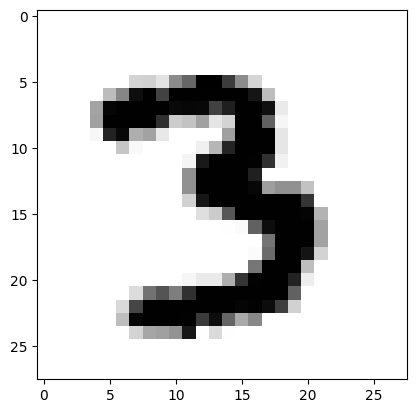

In [ ]:
# Podemos obtener el valor máximo del vector anterior para mostrar la clase a la que pertenece la imagen

print(f'la imagen de prueba numero {imag} es un ')
print(numeros_imagenes[np.argmax(prediccion[imag])])
# Verificamos revisando la imagen
plt.imshow(imagenes_prueba[imag], cmap=plt.cm.binary)

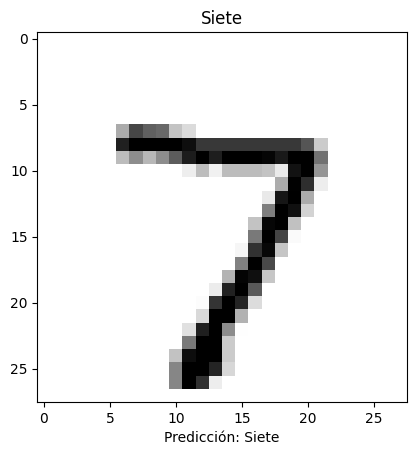

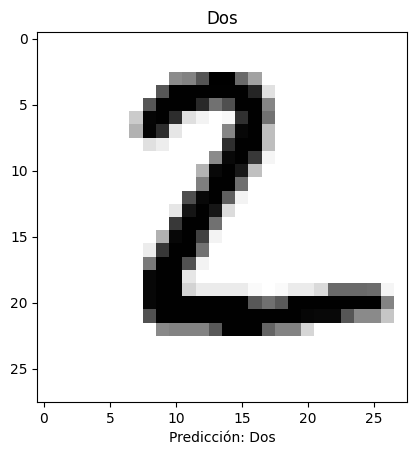

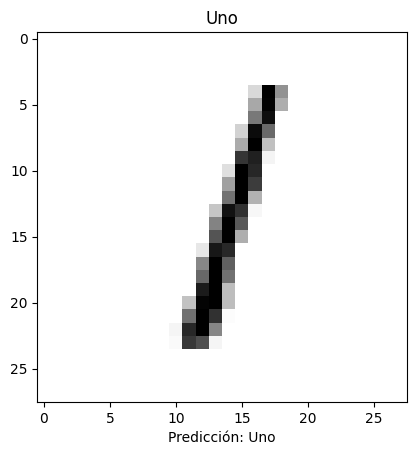

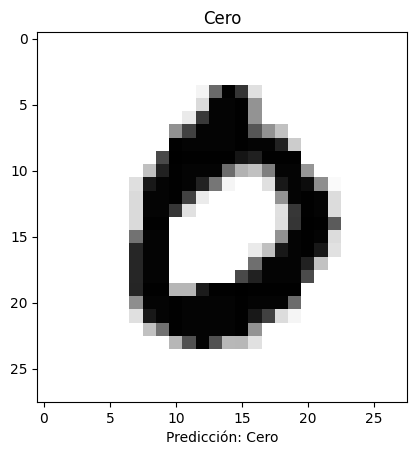

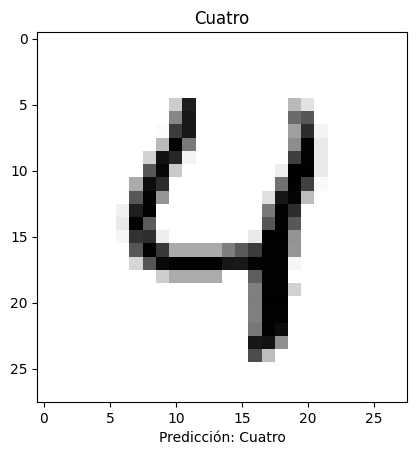

In [ ]:
# Para visualizar todas las imágenes de prueba
for i in range(5):
    plt.imshow(imagenes_prueba[i], cmap=plt.cm.binary)
    plt.xlabel('Predicción: ' + numeros_imagenes[np.argmax(prediccion[i])])
    plt.title(numeros_imagenes[labels_prueba[i]])
    plt.show()